# Import Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

sns.set()

# Load Data Set

In [2]:
df=pd.read_excel('../../Downloads/Data_Train.xlsx')

#  Show first five row information of the data

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Shape of the dataset (rows x columns)

In [4]:
df.shape

(10683, 11)

# Columns

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Check Information of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
 df.dropna(inplace= True)

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

 #  EDA

In [11]:
# dt.day method will extract only day of that of date
#dt.month method will extract only month of that of date

In [12]:
df['Journey_day']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
 # since we have convert Date of jurney column into integers , now we can drop as it is of no use.
df.drop('Date_of_Journey',axis= 1,inplace=True)

In [15]:
 # Departure time is when a plane leaves the gate.   
# since we have convert Date of jurney column into integers , now we can drop as it is of no use.
# Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
# Extracting Minutes
df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
# since we have convert Date of Dep_ Time into integers , now we can drop as it is of no use.
df.drop('Dep_Time',axis=1,inplace=True)

In [16]:
# Arrival time is when the plane pulls up to the gate.
# Smilar to Date of Journey we can extract values from Arrival Time.
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute


In [17]:
#since we have convert Arrival Time into integers , now we can drop as it is of no use.
df.drop('Arrival_Time',axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
# Time taken by plane to reach destination is called Duration.
# it is difference betwwen arrival time and Depature.
# Assigning and converting Duration Column into list.
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:    # Check Duration Contain only Hour or mins.
        if 'h'in duration[i]:
            duration[i]=duration[i].strip()+' 0m'  # Add Zero minute
        else:
            duration[i]='0h '+duration[i]       # Add hours

duration_hours=[]
duration_mins=[]
for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split(sep='h')[0]))  # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep='h')[0].split()[-1])) # Extraxt only min from duration

In [20]:
 # Adding duration _hours and duration_mins to dataFrame
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,4


In [22]:
# now delete duration Column
df.drop('Duration',axis=1,inplace=True)

#  Handeling Categrical Data

In [23]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

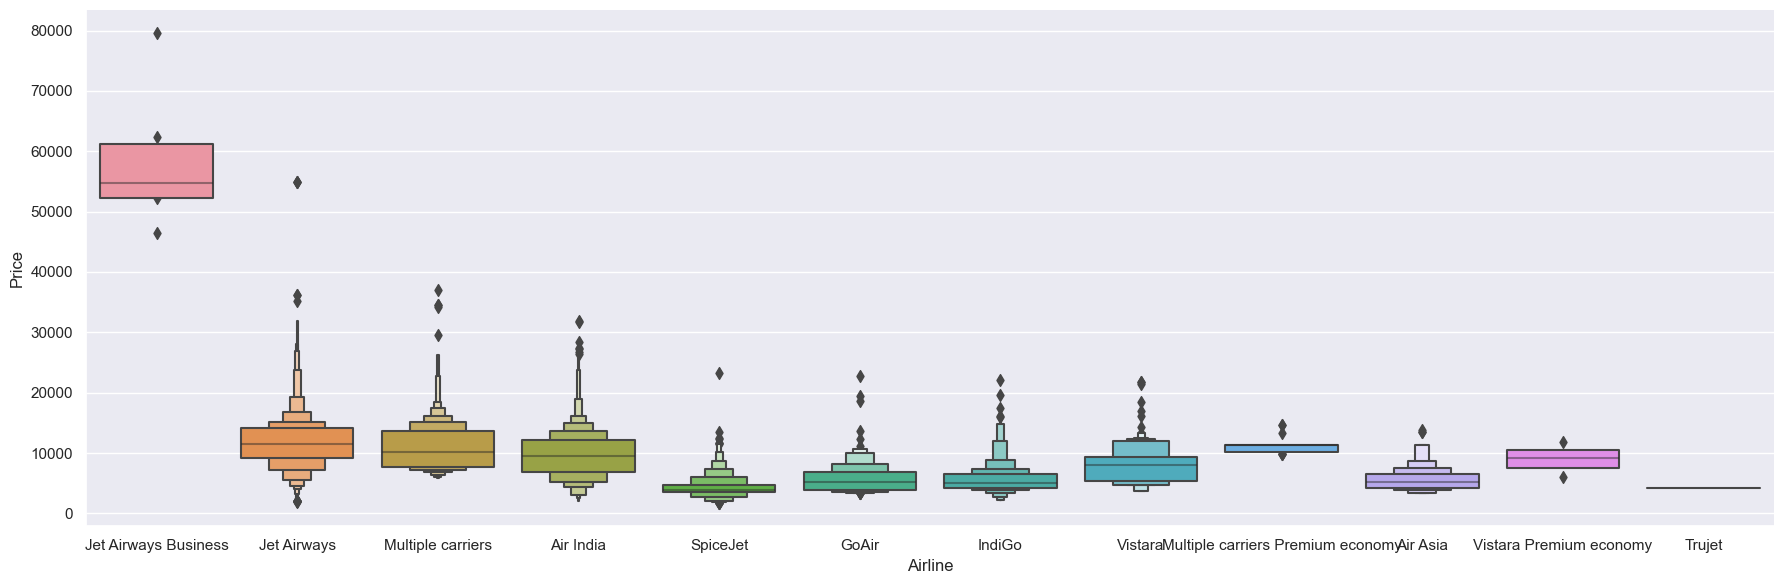

In [24]:
# From  graph we can see that Jet Airways Business have the highest Price.
# Appart from the first Airline almost all having similar median.

# Airline vs Price
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [25]:
 # As Airline is nomial Categorical Data we will perform Onehotencoding
    
Airline=df[['Airline']]
Airline= pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

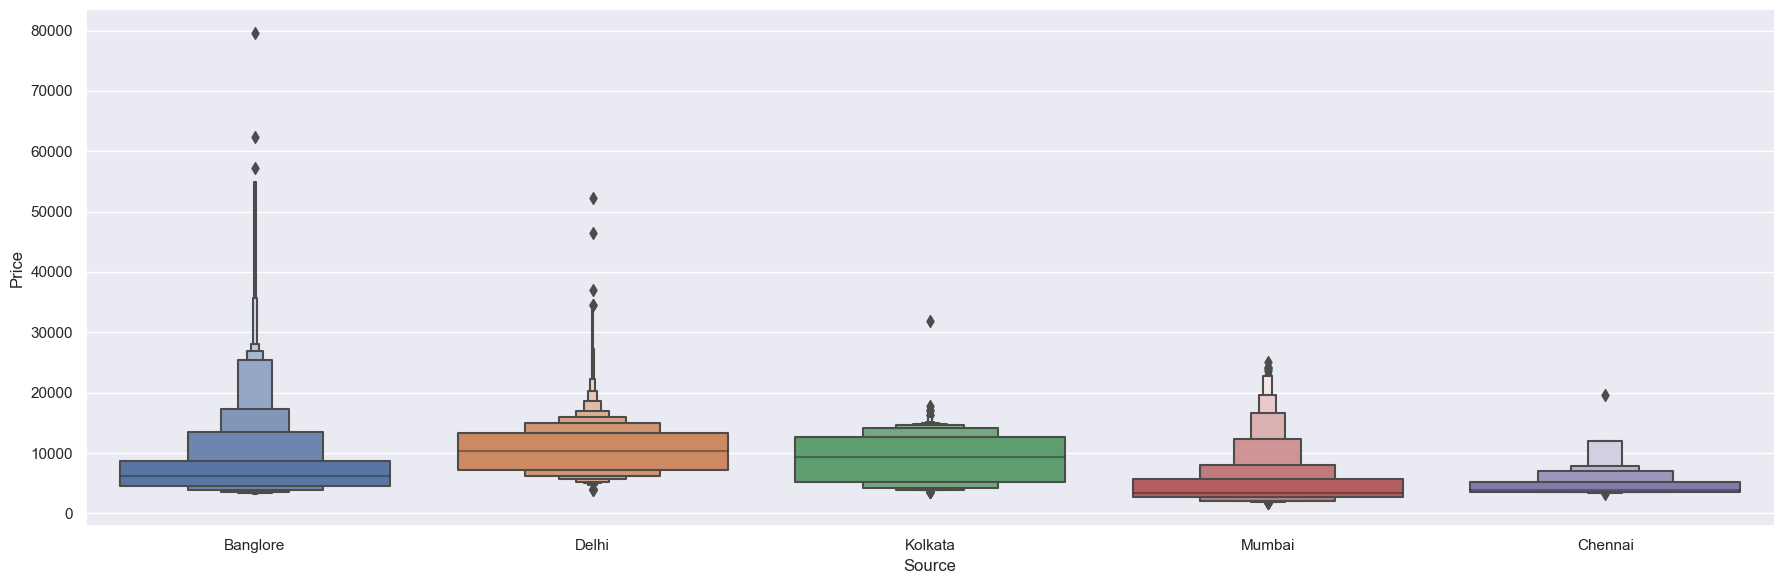

In [27]:
# Source vs Price
sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [28]:
# As source is Nominal Categrocial Data we will perform Oheencoding.
source=df[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
 df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
# Destination is numerical Categrical Data so we prefer Onehot Encoder.
destination=df[['Destination']]
destination=pd.get_dummies(destination,drop_first= True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [32]:
# Additionaly Info contain almost 80% no_info
#Route and Total_stops are realted to each other.
df.drop(['Route','Additional_Info'],axis=1,inplace= True)

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,4


In [34]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
 # As case is ordinal Categories type we perform labelEncoding.
# Here value assigning with corresponding keys.
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace= True)

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,4


In [37]:
 # Concate  data frame df+Airline +Source+Destination
df=pd.concat([df,Airline,source,destination],axis=1)

In [38]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df.drop(['Airline','Source','Destination'],axis=1,inplace= True)

In [40]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,4,...,0,0,0,0,0,0,0,0,0,1


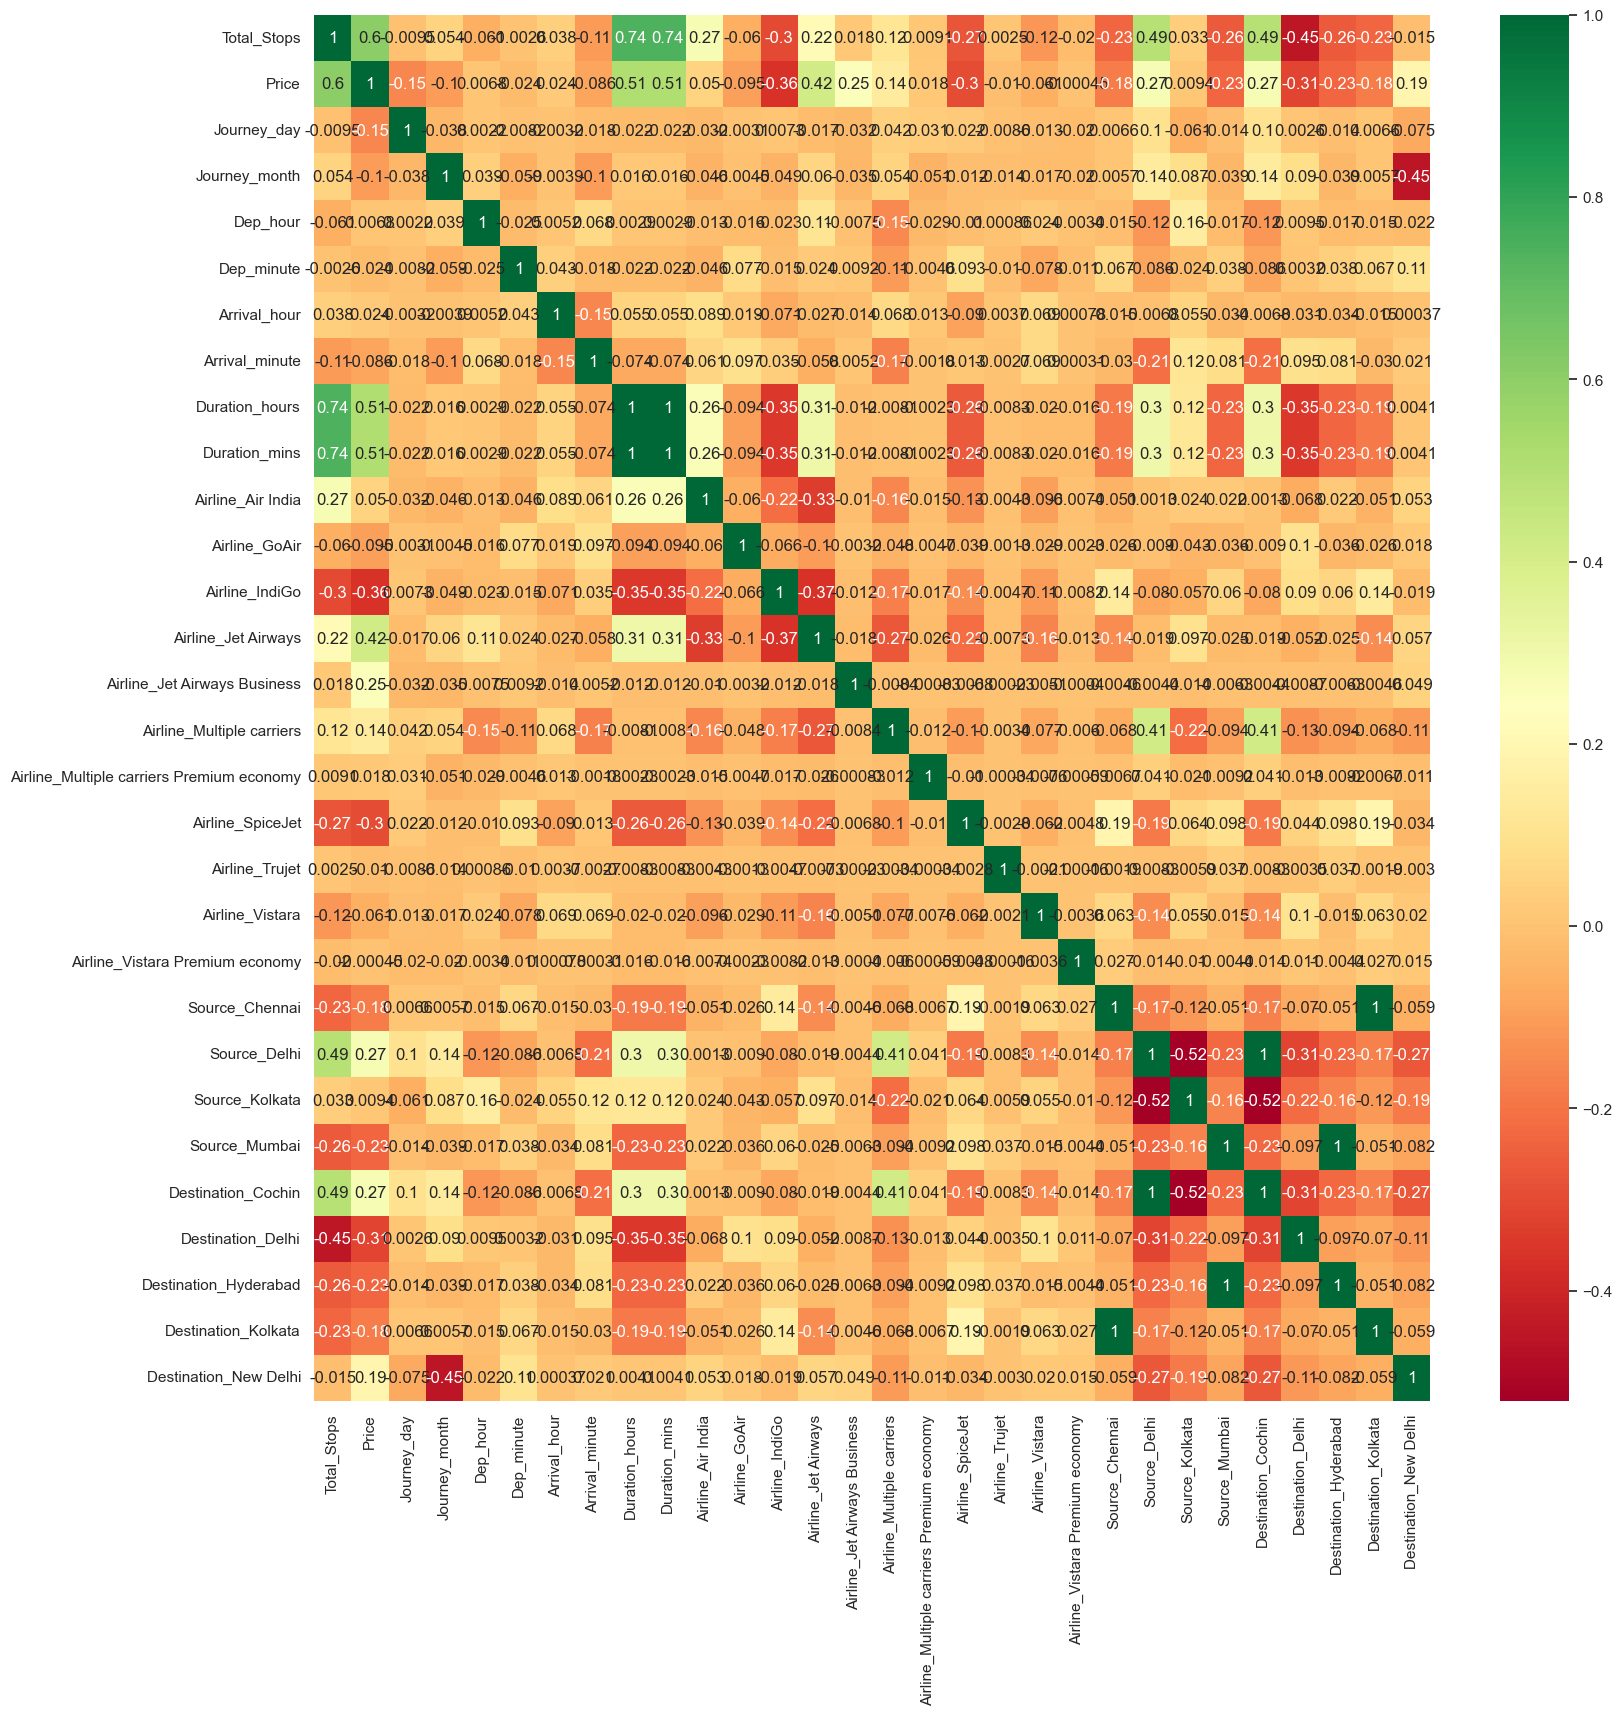

In [41]:
 # Find correlation between independent and dependent attributes.
plt.figure(figsize =(18,18))
sns.heatmap(df.corr(),annot= True,cmap='RdYlGn')
plt.show()

# Select Dependent column and Indepedent Column

In [42]:
x=df.drop('Price',axis=1,inplace=False)
y=df['Price']

In [43]:
# 

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

# Model Building  

 # Randomforest

In [45]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
yp=model_rf.predict(x_test)

In [47]:
model_rf.score(x_train,y_train)

0.9542687379185992

In [48]:
model_rf.score(x_test,y_test)

0.8190397084767316

# Linear Regression

In [49]:
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)

LinearRegression()

In [50]:
model_lin.score(x_train,y_train)

0.6129890941265299

In [51]:
model_lin.score(x_test,y_test)

0.6510755647416017

 # KNN Model

In [52]:
model_knn=KNeighborsRegressor()
model_knn.fit(x_train,y_train)

KNeighborsRegressor()

In [53]:
model_knn.score(x_train,y_train)

0.7234817835786316

In [54]:
model_knn.score(x_test,y_test)

0.6312209136009463

C:\Users\ghada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


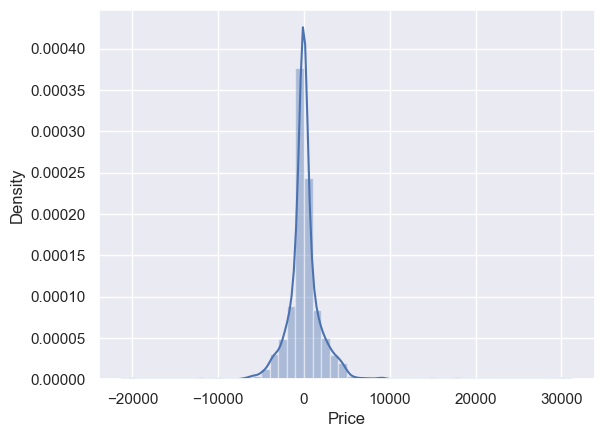

In [55]:
sns.distplot(y_test-yp)
plt.show()

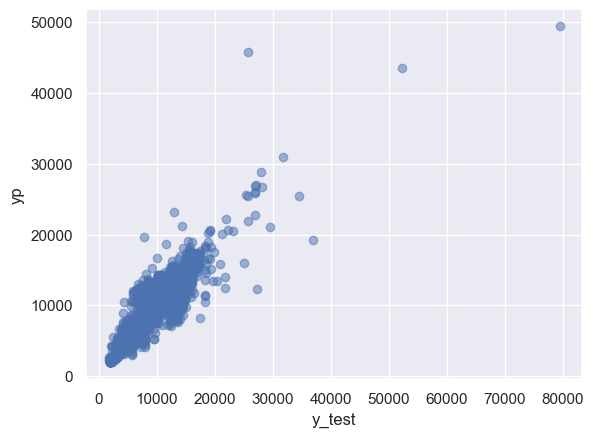

In [56]:
plt.scatter(y_test,yp,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('yp')
plt.show()

# Model Evaluation

In [57]:
print('MSE:',mean_squared_error(y_test,yp))
print('MAE:',mean_absolute_error(y_test,yp))
print('R2_score :',r2_score(y_test,yp))

MSE: 3921452.5614789524
MAE: 1180.3392342189093
R2_score : 0.8190397084767316


In [58]:
import pickle

In [59]:
pickle.dump(model_rf,open('../../DSML17/ml/flight_rf.pkl','wb'))